<a href="https://colab.research.google.com/github/DrRauf/Data-Science-Assignment-04/blob/main/Assignment4_101220889.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Rauf Anata - 101220889
# Assignment 4

In [1]:
import pandas as pd
import numpy as np

In [2]:
#1	Download the test.csv file and store it in a DataFrame named, myDF.
from google.colab import drive
drive.mount('/content/drive')
fileName = '/content/drive/MyDrive/Data-Science/Assignment-04/test.csv'
myDF = pd.read_csv(fileName)

Mounted at /content/drive


In [3]:
myDF.shape

(950, 8)

In [4]:
#2	Show the first three rows of the DF.

myDF.head(3)

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,F,NXEYEM,EX85,[56$],Asia
1,20,299,21,M,VNFKZD,CT41,[18$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America


In [5]:
#3 Delete the ‘Model’ column from the DF temporarily

myDF.drop('Model', axis=1).head()

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,[56$],Asia
1,20,299,21,M,VNFKZD,[18$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
3,40,156,44,Q,RHRHJY,[89$],Asia
4,50,468,33,J,HPQCMC,[95$],Africa


In [ ]:
#4  Delete the ‘Model’ column permanently, using the assignment (Not inplace parameter).
# Is there any output when you run the permanent deletion?
# So, how can you make sure it is deleted?

myDF = myDF.drop('Model', axis=1)


In [6]:
myDF.columns


Index(['ID', 'Range', 'Value', 'Type', 'Zip Code', 'Model', 'Cost',
       'Continent'],
      dtype='object')

In [7]:
#5 Now, let’s delete rows 1, 3, and 5 permanently, using inplace. Then show the first 4 Rows of myDF.

myDF.drop([1,3,5], axis=0, inplace=True)
myDF.head(4)


,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,F,NXEYEM,EX85,[56$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America
4,50,468,33,J,HPQCMC,QX90,[95$],Africa
6,70,327,24,F,NLVQPY,JY72,[25$],Europe


In [ ]:
#6  Calculate the mean of ‘Range’ column

myDF['Range'].mean()

297.53326293558604

In [ ]:
#7	How many ‘F’ do we have in the ‘Type’ column? Replace them permanently with ‘AAA’ and show the first 5 rows.

len(myDF[myDF['Type'] == 'F'])

50

In [ ]:
myDF['Type'].replace('F', 'AAA', inplace=True)
myDF.head()

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,AAA,NXEYEM,[56$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
4,50,468,33,J,HPQCMC,[95$],Africa
6,70,327,24,AAA,NLVQPY,[25$],Europe
7,80,495,50,Z,DLUMAX,[70$],Antarctica


In [ ]:
#8 Get rid of the [, $ and ] from the ‘Cost’ column permanently and display the first 5 rows. What is the type of ‘Cost’ column after this?

# 2nd way to do:  myDF['Cost'] = myDF['Cost'].apply(lambda x:x[1:-2])

myDF['Cost'] = myDF['Cost'].str.replace(r'\D' ,'', regex = True)
myDF.head()

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,AAA,NXEYEM,56,Asia
2,30,378,28,X,IMGMFY,90,North America
4,50,468,33,J,HPQCMC,95,Africa
6,70,327,24,AAA,NLVQPY,25,Europe
7,80,495,50,Z,DLUMAX,70,Antarctica


In [ ]:
myDF['Cost'].dtype

dtype('O')

In [ ]:
#9 Change the ‘Cost’ column data type to integer and display the result.

myDF['Cost'] = myDF['Cost'].astype(int)
myDF['Cost'].dtype

dtype('int64')

In [ ]:
#10 Calculate the average of ‘Cost’ column. Then, calculate the average of ‘Cost’ for each ‘Continent’.

myDF['Cost'].mean()

54.586061246040124

In [ ]:
myDF.groupby('Continent').mean()['Cost']

Continent
Africa           54.741259
Antarctica       54.706897
Asia             54.279070
Australia        56.838028
Europe           53.258993
North America    55.006993
South America    53.162963
Name: Cost, dtype: float64

In [ ]:
#11 Calculate the min, max and standard deviation of the ‘Cost’ column, group by each ‘Continent’, all in one command.

myDF.groupby('Continent').agg({'Cost': ['min', 'max', 'std']})

Cost               
               min max        std
Continent                        
Africa          11  97  25.961432
Antarctica      10  97  24.880590
Asia            10  99  26.109737
Australia       10  97  26.057121
Europe          10  99  26.185054
North America   10  99  25.664821
South America   10  98  25.724780

In [ ]:
#12 Calculate the min, max and standard deviation of all numerical columns, group by each ‘Continent’, all in one command.


myDF.groupby('Continent')[myDF.select_dtypes(include='number').columns].agg(['min', 'max', 'std'])

ID                    Range                  Value      \
               min   max          std   min  max         std   min max   
Continent                                                                
Africa          50  9450  2614.387519   100  494  118.110406    10  50   
Antarctica      80  9370  2936.313786   106  495  114.401370    10  50   
Asia            10  9390  2683.431665   103  499  112.047425    10  50   
Australia      120  9410  2793.945560   104  496  116.374530    10  50   
Europe          70  9480  2623.991892   101  500  116.808685    10  50   
North America   30  9490  2841.216413   104  500  113.611333    11  50   
South America   90  9500  2656.186804   104  499  117.375623    10  50   

                         Cost                 
                     std  min max        std  
Continent                                     
Africa         12.498931   11  97  25.961432  
Antarctica     11.978316   10  97  24.880590  
Asia           11.752819   10  99  26.109737  
Australia      13.138226   10  97  26.057121  
Europe         11.999544   10  99  26.185054  
North America  12.319601   10  99  25.664821  
South America  11.762450   10  98  25.724780

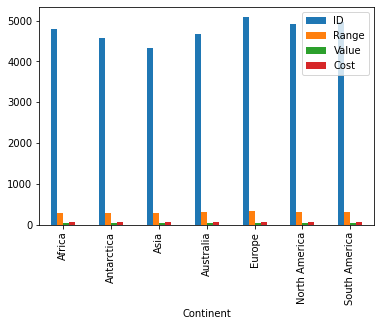

In [ ]:
#13 Illustrate the mean of all numerical columns, group by the ‘Continent’, using a ‘bar’ chart.

myDF.groupby('Continent').mean().plot(kind='bar')

In [ ]:
#14 Count the number of each continent in the ‘Continent’ column.

myDF['Continent'].value_counts()

North America    143
Africa           143
Australia        142
Europe           139
South America    135
Asia             129
Antarctica       116
Name: Continent, dtype: int64

In [ ]:
#15 Show the percentage of each continent in the ‘Continent’ column

myDF['Continent'].value_counts()/len(myDF)*100

North America    15.100317
Africa           15.100317
Australia        14.994720
Europe           14.677930
South America    14.255544
Asia             13.621964
Antarctica       12.249208
Name: Continent, dtype: float64

In [ ]:
#16 Show the unique values that we have in the ‘Continent’ column. Then show the number of unique values that we have in the ‘Continent’ column.

myDF['Continent'].unique()

array(['Asia', 'North America', 'Africa', 'Europe', 'Antarctica',
       'South America', 'Australia'], dtype=object)

In [ ]:
myDF['Continent'].nunique()

7

In [ ]:
#17 Use the value_count method for the ‘Cost’ column and describe the output as a comment in the next cell, using the # for the comment.


myDF['Cost'].value_counts()

56    20
35    20
73    18
54    17
97    17
      ..
18     5
94     5
22     5
42     3
24     2
Name: Cost, Length: 90, dtype: int64

In [ ]:
# for instance, the value of '56' is repeated 20 times in whole DF.

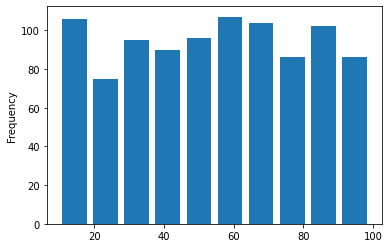

In [ ]:
#18 Plot a histogram for the ‘Cost’ column

myDF['Cost'].plot(kind='hist', rwidth=0.8)

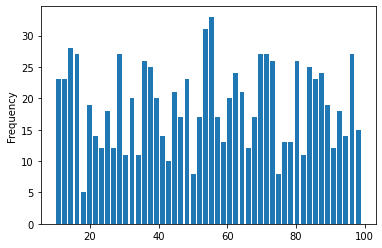

In [ ]:
#19 Bonus question: Try to change the number of bins to 50 to show the result more accurately

myDF['Cost'].plot(kind='hist', bins=50, rwidth=0.8)

In [ ]:
#20 How many missing values do we have in the ‘Zip Code’ column? How many missing values in the ‘Type’ column? Provide a brief summary of null values for the entire Data Frame.

print('Zip Code: ',myDF['Zip Code'].isna().sum())

print('Type: ', myDF['Type'].isna().sum())

print('\nThe entire Data Frame: \n\n', myDF.isna().any())

Zip Code:  9
Type:  2

The entire Data Frame: 

 ID           False
Range        False
Value        False
Type          True
Zip Code      True
Cost         False
Continent    False
dtype: bool


In [ ]:
#21 If we drop all the rows that have ‘any’ missing value, how many rows will remain in myDF?

print('Before: ',len(myDF))

Before:  947


In [ ]:
myDF.dropna().shape

(936, 7)

In [ ]:
#22 Show the statistics for the ‘Type’ column using the value_count method, including the NaN values in the list. How many missing values do we have?

myDF['Type'].value_counts()

AAA    50
N      47
Z      44
Q      44
C      43
K      41
V      41
A      40
H      39
Y      39
G      38
M      37
X      37
U      36
O      36
L      35
J      35
S      34
I      33
W      32
D      30
B      29
T      28
P      28
R      25
E      24
Name: Type, dtype: int64

In [ ]:
myDF['Type'].isna().sum()

2

In [ ]:
#23 Replace the ‘Type’ column missing values with ‘XXX’ and show the result again

myDF['Type'] = myDF['Type'].replace(np.nan, 'XXX')
myDF['Type'].value_counts()

AAA    50
N      47
Z      44
Q      44
C      43
K      41
V      41
A      40
H      39
Y      39
G      38
M      37
X      37
U      36
O      36
L      35
J      35
S      34
I      33
W      32
D      30
B      29
T      28
P      28
R      25
E      24
XXX     2
Name: Type, dtype: int64

In [ ]:
#24 Drop the rows that have any missing value permanently and show the number of rows after running the drop command

print('Before: ',len(myDF))
myDF = myDF.dropna()
print('After: ',len(myDF))

Before:  938
After:  938


In [ ]:
myDF.columns

Index(['ID', 'Range', 'Value', 'Type', 'Zip Code', 'Cost', 'Continent'], dtype='object')

In [ ]:
#25 Set the ‘ID’ column as the new index and delete the index name. Then show the first 5 rows of the DF. Show the value of the cell that its ID is 70 and its column header is ‘Value’.

myDF = myDF.set_index('ID')

In [ ]:
myDF.index.name = None

In [ ]:
myDF.head()

,Range,Value,Type,Zip Code,Cost,Continent
10,192,50,AAA,NXEYEM,56,Asia
30,378,28,X,IMGMFY,90,North America
50,468,33,J,HPQCMC,95,Africa
70,327,24,AAA,NLVQPY,25,Europe
80,495,50,Z,DLUMAX,70,Antarctica


In [ ]:
myDF[myDF.index == 70]['Value']

70    24
Name: Value, dtype: int64

In [ ]:
#26 Show the index, columns and the shape of the current DF. Bring back the ID column to the DF and reset the index. Again, show the index, columns and the shape of the current DF.

print('Index: ',myDF.index)
print('\nColumns: ',myDF.columns)
print('\nShape: ',myDF.shape)

Index:  Int64Index([  10,   30,   50,   70,   80,   90,  100,  110,  120,  130,
            ...
            9410, 9420, 9430, 9440, 9450, 9460, 9470, 9480, 9490, 9500],
           dtype='int64', length=938)

Columns:  Index(['Range', 'Value', 'Type', 'Zip Code', 'Cost', 'Continent'], dtype='object')

Shape:  (938, 6)


In [ ]:
myDF['ID'] = myDF.index
myDF = myDF.reset_index(drop=True)

In [ ]:
#After Reset

print('Index: ',myDF.index)
print('Columns: ',myDF.columns)
print('Shape: ',myDF.shape)

Index:  RangeIndex(start=0, stop=938, step=1)
Columns:  Index(['Range', 'Value', 'Type', 'Zip Code', 'Cost', 'Continent', 'ID'], dtype='object')
Shape:  (938, 7)


In [ ]:
myDF.head()

,Range,Value,Type,Zip Code,Cost,Continent,ID
0,192,50,AAA,NXEYEM,56,Asia,0
1,378,28,X,IMGMFY,90,North America,1
2,468,33,J,HPQCMC,95,Africa,2
3,327,24,AAA,NLVQPY,25,Europe,3
4,495,50,Z,DLUMAX,70,Antarctica,4


In [ ]:
#27 Use the describe method to see the statistics of myDF and fetch the value of the first row and the third column of the result

myDF.describe()

,Range,Value,Cost,ID
count,938.000000,938.000000,938.000000,938.000000
mean,297.531983,29.917910,54.611940,468.500000
std,115.913345,12.292447,25.742149,270.921575
min,100.000000,10.000000,10.000000,0.000000
25%,194.000000,19.000000,33.000000,234.250000
50%,295.000000,30.000000,55.000000,468.500000
75%,400.000000,41.000000,76.000000,702.750000
max,500.000000,50.000000,99.000000,937.000000


In [ ]:
myDF.describe().iloc[0,2]

938.0

In [ ]:
#28 Sort the value_counts() of the ‘Continent’ column of the DF. Then, sort the value_counts() of the ‘Continent’ column, based on the alphabetic order of the continents

myDF['Continent'].value_counts().sort_values()

Antarctica       115
Asia             129
South America    135
Europe           138
Africa           139
North America    141
Australia        141
Name: Continent, dtype: int64

In [ ]:
type(myDF['Continent'])

pandas.core.series.Series

In [ ]:
myDF['Continent'].dtype

dtype('O')

In [ ]:
# myDF['Continent'].value_counts().sort_values(by=['Continent'],ascending = True)

myDF = myDF.sort_values(by=['Continent'],ascending = True)

myDF['Continent']

225           Africa
771           Africa
768           Africa
162           Africa
369           Africa
           ...      
217    South America
206    South America
204    South America
687    South America
937    South America
Name: Continent, Length: 938, dtype: object

In [ ]:
#29 Show all the columns of the following rows in one command. [1,3,5,7] and show the first 7 rows of the following columns: ‘Type’ and ‘Continent’


myDF.iloc[[1,3,5,7],:]

,Range,Value,Type,Zip Code,Cost,Continent,ID
771,195,49,Y,TDIKTW,37,Africa,771
162,184,48,M,MPEFLA,74,Africa,162
165,177,23,A,BITEMX,21,Africa,165
167,192,33,C,PBFDLC,96,Africa,167


In [ ]:
myDF[['Type','Continent']][:7]

,Type,Continent
225,K,Africa
771,Y,Africa
768,N,Africa
162,M,Africa
369,N,Africa
165,A,Africa
367,M,Africa


In [ ]:
#30	Show the ‘Value’ of the ‘Type’ that are equal to ’XXX’

myDF[myDF['Type']=='XXX']


,Range,Value,Type,Zip Code,Cost,Continent,ID
743,272,37,XXX,OAPPHA,41,Africa,743
687,336,42,XXX,HLULLE,64,South America,687


In [ ]:

myDF.Value[myDF['Type']=='XXX']

743    37
687    42
Name: Value, dtype: int64